In [146]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
from config import *

# Difference between imperative and declarative libraries

## Imperative libraries
Specify the steps to build a chart

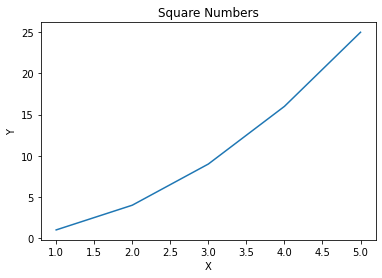

In [148]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.title('Square Numbers')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Declarative libraries
Define what you want to achieve

In [149]:
import altair as alt
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [1, 4, 9, 16, 25]})

chart = alt.Chart(df).mark_line().encode(
    x='x',
    y='y'
).properties(
    title='Square Numbers'
)

# Statistics Generative AI

In [150]:
df = pd.DataFrame(
    {'categories': ['Before AI', 'AI tools until 2022', 'New generative AI tools'], 
     'hours': [78,56,36]
    })
df

,categories,hours
0,Before AI,78
1,AI tools until 2022,56
2,New generative AI tools,36


In [151]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('hours'),
    y=alt.Y('categories', sort='-x',title='')
).properties(
    title='Number of hours spent by developers'
)

chart

alt.Chart(...)

In [152]:
chart = alt.Chart(df).mark_bar().encode(
    y=alt.Y('hours'),
    x=alt.X('categories', sort='-y',title='', axis=alt.Axis(labelAngle=0))
).properties(
    title='Number of hours spent by developers',
    width=350
)

chart

alt.Chart(...)

In [153]:
mask = df['categories'] == 'Before AI'
baseline = df[mask]['hours'].values[0]

In [154]:
df['perc_increase'] = abs((df['hours'] - baseline)/baseline*100)

In [155]:
df['perc_increase']

0     0.000000
1    28.205128
2    53.846154
Name: perc_increase, dtype: float64

In [158]:
base = alt.Chart(df[~mask]).encode(
    y=alt.Y('perc_increase', scale=alt.Scale(domain=[0,100]), title='Percentage Increase'),
    x=alt.X('categories', sort='y',title='', axis=alt.Axis(labelAngle=0)),
    text=alt.Text('perc_increase:Q', format='.02f'),
).properties(
    title='Increase in developers speed compared to pre-AI era',
    width=350
)

chart = base.mark_bar(color=iColor) + base.mark_text(dy=-10,fontSize=16)

chart.configure_axis(
        labelFontSize=labelFontSize,
        titleFontSize=15,
        grid=False
    ).configure_title(fontSize=fontSize,offset=20
    ).configure_view(strokeWidth=0)

alt.LayerChart(...)